CPU:


In [ ]:
import random
import time

def calculate_area(points: int, dimension: float):
    start = time.time()
    hit = 0
    for i in range(points):
        x_rand = (random.random() - 0.5) * 2 * dimension
        y_rand = (random.random() - 0.5) * 2 * dimension
        if (x_rand ** 2 + y_rand ** 2) <= dimension ** 2: hit += 1
        
    area = hit/points*4*dimension**2
    end = time.time()
    print("Czas trwania obliczeń: ", end - start)
    return area

num_points = 100000000
for dimension in [1, 2, 3, 4, 5]:
    print("Powierzchnia dla wymiaru: ", dimension)
    print("Powierzchnia: ", calculate_area(num_points, dimension))



Powierzchnia dla wymiaru:  1
Czas trwania obliczeń:  73.29131293296814
Powierzchnia:  3.14127156
Powierzchnia dla wymiaru:  2
Czas trwania obliczeń:  70.7254958152771
Powierzchnia:  12.56699776
Powierzchnia dla wymiaru:  3
Czas trwania obliczeń:  70.54082703590393
Powierzchnia:  28.2736674
Powierzchnia dla wymiaru:  4
Czas trwania obliczeń:  71.12316370010376
Powierzchnia:  50.26883072
Powierzchnia dla wymiaru:  5
Czas trwania obliczeń:  70.65961384773254
Powierzchnia:  78.536713


GPU:


In [ ]:
import torch
import time

def calculate_area(points: int, dimension: float):
    start = time.time()
    x = torch.rand(points, device=torch.device("cuda"))*2*dimension - dimension
    y = torch.rand(points, device=torch.device("cuda"))*2*dimension - dimension
    area = (((x**2 + y**2) <= dimension**2).sum().to(torch.float32))/points*4*dimension**2
    end = time.time()
    print("Czas trwania obliczeń: ", end - start)
    return area

points = 100000000
for dimension in [1, 2, 3, 4, 5]:
    print("Powierzchnia dla wymiaru: ", dimension)
    print("Powierzchnia: ", calculate_area(points, dimension))

Powierzchnia dla wymiaru:  1
Czas trwania obliczeń:  0.00524139404296875
Powierzchnia:  tensor(3.1415, device='cuda:0')
Powierzchnia dla wymiaru:  2
Czas trwania obliczeń:  0.000858306884765625
Powierzchnia:  tensor(12.5671, device='cuda:0')
Powierzchnia dla wymiaru:  3
Czas trwania obliczeń:  0.000507354736328125
Powierzchnia:  tensor(28.2769, device='cuda:0')
Powierzchnia dla wymiaru:  4
Czas trwania obliczeń:  0.0007963180541992188
Powierzchnia:  tensor(50.2596, device='cuda:0')
Powierzchnia dla wymiaru:  5
Czas trwania obliczeń:  0.0007088184356689453
Powierzchnia:  tensor(78.5397, device='cuda:0')


Przedstawie czasy na trzech wykresach, najpierw dla CPU, następnie dla GPU, a na koniec łączony, żeby jeszcze bardziej podkreślić różnicę.

**WYKRES ZALEŻNOŚĆI CZASU OD WYMIARÓW** <BR>
**DLA CPU**

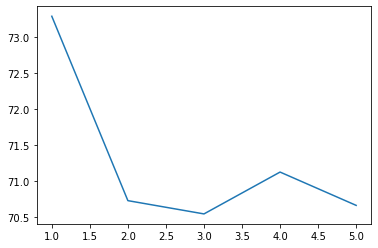

In [1]:
import matplotlib.pyplot as plt

Powierzchnia = [1, 2, 3, 4, 5]
Czas = [73.29131293296814, 70.7254958152771, 70.54082703590393, 71.12316370010376, 70.65961384773254]
plt.plot(Powierzchnia, Czas)

plt.show()

**WYKRES ZALEŻNOŚĆI CZASU OD WYMIARÓW** <BR>
**DLA GPU**

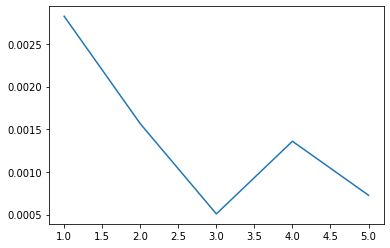

In [2]:
import matplotlib.pyplot as plt

Powierzchnia = [1, 2, 3, 4, 5]
Czas = [0.0028247833251953125, 0.0015654563903808594, 0.0005078315734863281, 0.0013594627380371094, 0.0007264614105224609]
plt.plot(Powierzchnia, Czas)

plt.show()

**WYKRES ZALEŻNOŚĆI CZASU OD WYMIARÓW** <BR>
**WYKRES ŁĄCZONY**

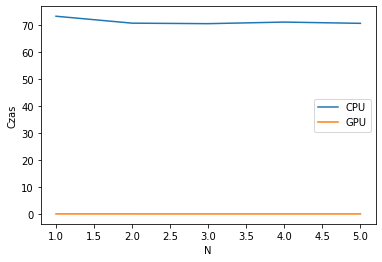

In [3]:
import matplotlib.pyplot as plt
x  = [1, 2, 3, 4, 5]
CPU = [73.29131293296814, 70.7254958152771, 70.54082703590393, 71.12316370010376, 70.65961384773254]
GPU = [0.0028247833251953125, 0.0015654563903808594, 0.0005078315734863281, 0.0013594627380371094, 0.0007264614105224609]
plt.plot(x, CPU, label="CPU")
plt.plot(x, GPU, label="GPU")
plt.plot()

plt.xlabel("N")
plt.ylabel("Czas")
plt.legend()
plt.show()

**WNIOSKI**<br>
Jak widać kod napisany na GPU wykonuje się kilkadziesiąt razy szybciej, co jest ogromnym zwiększeniem wydajności.